<br>
<font face="Helvetica"  size="11px" color="#323752" >           Measures for Association in Categorical Data</font>

***

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752" >In this lecture we will learn <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Contingency tables and Chi-square.</b></font> Also some coding basics will be mentioned. In the last part we will focus on data visualization and plot libraries. 

<br>  
<font face="Helvetica" size="3.5px" color="#323752" >First we will import the neccesarry libraries.</font>
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator
import csv
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We do not want to see undesired warnings in our report.</font>
<br>
<br>

In [2]:
warnings.filterwarnings('ignore')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >It's time to read the dataset. The dataset is taken from <a href="url" target="_blank"> https://cses.org/data-download/cses-module-5-2016-2021/</a>  . All the necessary information about the dataset is given in the booklets at the website. Especially, reading the booklet about the variable names is recommended. Our dataset is in cvs format. 
</font>
<br>
<br>


In [3]:
#data = pd.read_csv(r'cses5.csv')
#data.info()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Our dataset columns has code names for variables. We will change the names in oder to simplify the understanding.</font>
<br>
<br>

In [4]:
#data = data.rename(columns={'E1006_NAM': 'country_name'})
#data = data.rename(columns={'E2002': 'gender'})
#data = data.rename(columns={'E2003': 'education'})
#data = data.rename(columns={'E2006': 'employement'})
#data = data.rename(columns={'E3024_4': 'closeness_party'})
#data = data.rename(columns={'E4006': 'turnout'})
#data = data.rename(columns={'E5075': 'women_in_parliament'})

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Also, we get rid of the unnecessary variables to shrink the data, as shown in the previous info() command, it has 554 different variables (column entries).</font>
<br>
<br>

In [5]:
#data1 = data[['country_name', 'gender','education',
#        'employement', 'closeness_party','turnout','women_in_parliament']]

#data1.info()

In [6]:
data1 = pd.read_csv(r'data1.csv') 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55515 entries, 0 to 55514
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           55515 non-null  int64  
 1   country_name         55515 non-null  object 
 2   gender               55515 non-null  int64  
 3   education            55515 non-null  int64  
 4   employement          55515 non-null  int64  
 5   closeness_party      55515 non-null  int64  
 6   turnout              55515 non-null  float64
 7   women_in_parliament  55515 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 3.4+ MB


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > In the following cell, we will create a dictionary that use country names as dictionary keys. We will use this dictionary a lot in the remaining of the project. The main logic is spliting the total data by using country names. Therefore, we can use a country name to call all the data about this country.</font>
<br>
<br>

In [7]:
df_dict = {ct: data1[data1.country_name== ct].reset_index(drop=True) for ct in data1['country_name'].unique()}

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Before starting the calculations, we need to cleanse the data set. Since missing informations are determined, we need to get rid of them. For instance, a missing information in turnout data is given with <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>'997'</b></font> and <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>'999'</b></font>. So we need to make them <b>0 </b>before calculating the avarage turnout of the countries. While making the missing turnouts 0, we need to change respondent count so that avarage is not affected.
<br>
<br>

In [8]:
turnout_list = {}
count = {}
b = 0
for country in df_dict.keys():
    count[country]=0
    for i in range(len(df_dict[country]['turnout'])):
        if df_dict[country]['turnout'][i] == 997 or df_dict[country]['turnout'][i] == 999:
            df_dict[country]['turnout'][i] = 0
            count[country] = count[country] + 1
            
    b = sum(df_dict[country]['turnout'])
    if b == 0.0:
        b = 0.000001
        count[country] = len(df_dict[country])-1
    turnout_list[country] =  b/(len(df_dict[country])- count[country])

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Now, we have average turnouts of countries in the turnout_list and we can access them by using country names. 
<br>
Next step, we will sort them to find the most and the least. Some of the countries does not sustain neccessary data, those are at the end of the list.</font>
<br>
<br>

In [9]:
sorted_turnout = dict(sorted(turnout_list.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_turnout)

{'Australia': 92.12787860931059, 'Belgium': 88.7206829823555, 'Turkey': 88.02779232928033, 'Sweden': 87.25671511627937, 'Brazil': 83.9430167597752, 'Iceland': 80.48768499256693, 'Austria': 79.9780833333332, 'Norway': 78.4532366071428, 'Germany': 75.68032480314962, 'Italy': 73.12688877755477, 'Finland': 72.18648310388005, 'Taiwan': 70.81278338278948, 'Great Britain': 69.74130081300834, 'Canada': 68.02560581583201, 'Costa Rica': 65.9588688410825, 'Ireland': 65.01590233545657, 'New Zealand': 63.40353982300916, 'Hong Kong': 58.414290657439494, 'Republic of Korea': 57.80560467055897, 'Greece': 56.39044573643435, 'Portugal': 55.61186000000017, 'United States of America': 55.171381578947646, 'Lithuania': 50.3169533333337, 'Chile': 46.8356587926498, 'Switzerland': 46.17013993541263, 'France': 1e-06, 'Hungary': 1e-06, 'Montenegro': 1e-06}


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Let's see the top five in a clear format.</font>
<br>
<br>

In [10]:
top_five_list = [*sorted_turnout.keys()][0:5]

turnouts = {}
for country in top_five_list:
    turnouts[country] = turnout_list[country]
    
print(turnouts)

{'Australia': 92.12787860931059, 'Belgium': 88.7206829823555, 'Turkey': 88.02779232928033, 'Sweden': 87.25671511627937, 'Brazil': 83.9430167597752}


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Until now, we can determine our suspects. We will choose two countries for statistical analysis; one with high turnout value, the other one with low turnout value.
<br>
Our selected countries are :

    1) Turkey (high turnout value: 88.027)
    2) Switzerland (low turnout value: 46.170)
<br>
<br>

<br>
<font face="Helvetica"  size="7px" color="#323752" > Turkey - High Turnout</font>

***

<br>
<font face="Helvetica" size="3px" color="#323752" > We will start with clearing missing informations to get much more clean and logical graphs and tables.</font>
<br>
<br>

In [11]:
for i in range(len(df_dict['Turkey']['education'])):
    if df_dict['Turkey']['education'][i] == 97 or df_dict['Turkey']['education'][i] == 98 or df_dict['Turkey']['education'][i] == 99:
        df_dict['Turkey']['education'][i] = -1
    elif df_dict['Turkey']['education'][i] == 96:
        df_dict['Turkey']['education'][i] = 0

for i in range(len(df_dict['Turkey']['closeness_party'])):
    if df_dict['Turkey']['closeness_party'][i] == 7 or df_dict['Turkey']['closeness_party'][i] == 8 or df_dict['Turkey']['closeness_party'][i] == 9:
        df_dict['Turkey']['closeness_party'][i] = -1

for i in range(len(df_dict['Turkey']['employement'])):
    if df_dict['Turkey']['employement'][i] == 13 or df_dict['Turkey']['employement'][i] == 14 or df_dict['Turkey']['employement'][i] == 97  or df_dict['Turkey']['employement'][i] == 98  or df_dict['Turkey']['employement'][i] == 99:
        df_dict['Turkey']['employement'][i] = -1

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Now, we can start to learn what is Contingency tables and Chi-square. We will create a table in the following cells with gender and degree of closeness to a party in Turkey. This table is used to learn the concepts but different social statuses that are listed above might be selected. </font>
<br>
<br>


In [12]:
count_female_t = 0
count_male_t = 0

male = [0]*4
female = [0]*4
for i in range(len(df_dict['Turkey']['gender'])):
    if df_dict['Turkey']['closeness_party'][i] == 1:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[0] = male[0] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[0] = female[0] + 1
    if df_dict['Turkey']['closeness_party'][i] == 2:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[1] = male[1] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[1] = female[1] + 1
    if df_dict['Turkey']['closeness_party'][i] == 3:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[2] = male[2] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[2] = female[2] + 1
    if df_dict['Turkey']['closeness_party'][i] == -1:
        if df_dict['Turkey']['gender'][i] == 1:
            count_male_t = count_male_t + 1;
            male[3] = male[3] + 1
        elif df_dict['Turkey']['gender'][i] == 2:
            count_female_t = count_female_t + 1
            female[3] = female[3] + 1


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We are going to create sample data which is about gender and degree of closeness to a party in Turkey. <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Pandas </b></font>index and columns are used to name rows and columns. 
<br>
<br>

In [13]:
closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])

closeness_party

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,125,170,17,160
Female,138,258,16,185


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Python uses zero-based indexing. That means, the first element has an index 0, the second has index 1, and so on. If you want to access the fourth value in the <b>chi2_contingency(closeness_party)</b> you need to use <b>[3]</b>.</font>
<br>
<br>

<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>chi2_contingency</b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>SciPy’s chi2_contingency() </b></font>returns four values, <b> 𝜒2 value, p-value, degree of freedom and expected values.</b>
<br>
<br>

In [14]:
chi2_contingency(closeness_party)

(6.044118123095128,
 0.10948340023844266,
 3,
 array([[116.12347989, 188.97661366,  14.57062675, 152.3292797 ],
        [146.87652011, 239.02338634,  18.42937325, 192.6707203 ]]))

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Expected values </b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places <b>round(2)</b>. </font>
<br>
<br>

In [15]:
df=chi2_contingency(closeness_party)[3]

pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"]).round(2)

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,116.12,188.98,14.57,152.33
Female,146.88,239.02,18.43,192.67


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > The table above is called <font face="Helvetica" size="3.5px" color="#63b6c7" ><b> a contingency table.</b>
<br>
<br>

<font face="Helvetica"  size="5px" color="#323752" ><b>𝜒2 value </b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. This is what chi2_contingency is doing behind the scene. Since Python is 0 based index, in order to print the 𝜒2 we need to use <b>[0]</b>, which is the first value.</font>
<br>
<br>

In [16]:
chisquare=chi2_contingency(closeness_party)[0]

chisquare

6.044118123095128

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>p-Value </b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds.</font>
<br>
<br>

In [17]:
pvalue=chi2_contingency(closeness_party)[1]

pvalue

0.10948340023844266

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Degree of freedom </b></font> 
<br>
<br> 

<font face="Helvetica" size="3px" color="#323752" >In the returned value from the chi2_contingency, the third one is the degree of freedom. We use <b>[2]</b> which is the third one. The following will output 3.</font>
<br>
<br>

In [18]:
dof=chi2_contingency(closeness_party)[2]

dof

3

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Critical values </b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > The level of significance and degree of freedom can be used to find the critical value. As I mentioned, you can find the degree of freedom from the array. State and define probability from the level of significance, 1%, 5% 10%, etc.</font>
<br>
<br>

In [19]:
significance = 0.01
p = 1 - significance
dof = chi2_contingency(closeness_party)[2]
critical_value = chi2.ppf(p, dof)

critical_value

11.344866730144373

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Let's check the p-value by using the critical value that we calculated </font>
<br>
<br>

In [20]:
p = chi2.cdf(critical_value, dof)

p

0.99

<br>
<font face="Helvetica" size="3px" color="#323752" > Which confirms the critical value.</font>
<br>
<br>

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>The Null and Alternative Hypotheses </b></font> 
<br>
<br> 

<font face="Helvetica" size="3px" color="#323752" >Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.</font>
<br>

<font face="Helvetica" size="3px" color="#323752" > If the calculated Chi-square is greater than the critical value we <b>reject the null hypothesis.</b></font>
<br>
<br>


In [21]:
chi, pval, dof, exp = chi2_contingency(closeness_party)
print('p-value is: ', pval)

significance = 0.05
p = 1 - significance

critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.10948340023844266
chi=6.044118, critical value=7.814728

At 0.05 level of significance, we accept the null hypotheses. 
They are independent.


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Alternatively, we can compare the p-value and the level of significance. If p-value < the level of significance, <b> we reject the null hypothesis.</b></font>
<br>
<br>

In [22]:
chi, pval, dof, exp = chi2_contingency(closeness_party)

significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.109483, significance=0.05

At 0.05 level of significance, we accept the null hypotheses. 
They are independent.


<br>
<br>
<font face="Helvetica"  size="7px" color="#323752" > Switzerland - Low Turnout</font>

***

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We will make same analysis on Switzerland. Same steps will be implemented. Try to get familiar with them. We will start with clearing missing informations to get much more clean and logical graphs and tables.</font>
<br>
<br>

In [23]:
for i in range(len(df_dict['Switzerland']['education'])):
    if df_dict['Switzerland']['education'][i] == 97 or df_dict['Switzerland']['education'][i] == 98 or df_dict['Switzerland']['education'][i] == 99:
        df_dict['Switzerland']['education'][i] = -1
    elif df_dict['Switzerland']['education'][i] == 96:
        df_dict['Switzerland']['education'][i] = 0

for i in range(len(df_dict['Switzerland']['closeness_party'])):
    if df_dict['Switzerland']['closeness_party'][i] == 7 or df_dict['Switzerland']['closeness_party'][i] == 8 or df_dict['Switzerland']['closeness_party'][i] == 9:
        df_dict['Switzerland']['closeness_party'][i] = -1

for i in range(len(df_dict['Switzerland']['employement'])):
    if df_dict['Switzerland']['employement'][i] == 13 or df_dict['Switzerland']['employement'][i] == 14 or df_dict['Switzerland']['employement'][i] == 97  or df_dict['Switzerland']['employement'][i] == 98  or df_dict['Switzerland']['employement'][i] == 99:
        df_dict['Switzerland']['employement'][i] = -1

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We will create a table in the following cells with gender and degree of closeness to a party in Switzerland. </font>
<br>
<br>


In [24]:
count_female_s = 0
count_male_s = 0

male = [0]*4
female = [0]*4
for i in range(len(df_dict['Switzerland']['gender'])):
    if df_dict['Switzerland']['closeness_party'][i] == 1:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[0] = male[0] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[0] = female[0] + 1
    if df_dict['Switzerland']['closeness_party'][i] == 2:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[1] = male[1] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[1] = female[1] + 1
    if df_dict['Switzerland']['closeness_party'][i] == 3:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[2] = male[2] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[2] = female[2] + 1
    if df_dict['Switzerland']['closeness_party'][i] == -1:
        if df_dict['Switzerland']['gender'][i] == 1:
            count_male_s = count_male_s + 1;
            male[3] = male[3] + 1
        elif df_dict['Switzerland']['gender'][i] == 2:
            count_female_s = count_female_s + 1
            female[3] = female[3] + 1


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We are going to create sample data which is about gender and degree of closeness to a party in Switzerland. <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Pandas </b></font>index and columns are used to name rows and columns. 
<br>
<br>

In [25]:
closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])

closeness_party

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,212,1078,579,436
Female,153,989,581,617


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Python uses zero-based indexing. That means, the first element has an index 0, the second has index 1, and so on. If you want to access the fourth value in the <b>chi2_contingency(closeness_party)</b> you need to use <b>[3]</b>.</font>
<br>
<br>

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>chi2_contingency</b></font> 
<br>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752" > <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>SciPy’s chi2_contingency() </b></font>returns four values, <b> 𝜒2 value, p-value, degree of freedom and expected values.</b> 
<br>
<br>

In [26]:
chi2_contingency(closeness_party)

(44.223405599340765,
 1.3529532990376792e-09,
 3,
 array([[ 181.12486545, 1025.71259419,  575.62970936,  522.532831  ],
        [ 183.87513455, 1041.28740581,  584.37029064,  530.467169  ]]))

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Expected values </b></font> 
<br>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752" > You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places <b>round(2)</b>. </font>
<br>
<br>

In [27]:
df=chi2_contingency(closeness_party)[3]

pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"]).round(2)

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Male,181.12,1025.71,575.63,522.53
Female,183.88,1041.29,584.37,530.47


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > The table above is called <font face="Helvetica" size="3.5px" color="#63b6c7" ><b> a contingency table</b></font>.
<br>
<br>

<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>𝜒2 value </b></font> 
<br>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752" > The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. This is what chi2_contingency is doing behind the scene. Since Python is 0 based index, in order to print the 𝜒2 we need to use <b>[0]</b>, which is the first value.</font>
<br>
<br>

In [28]:
chisquare=chi2_contingency(closeness_party)[0]

chisquare

44.223405599340765

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>p-Value </b></font> 
<br>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752" > You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds.</font>
<br>
<br>

In [29]:
pvalue=chi2_contingency(closeness_party)[1]

pvalue

1.3529532990376792e-09

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Degree of freedom </b></font> 
<br>
<br> 

<br>
<font face="Helvetica" size="3px" color="#323752" >In the returned value from the chi2_contingency, the third one is the degree of freedom. We use <b>[2]</b> which is the third one. The following will output 3.</font>
<br>
<br>

In [30]:
dof=chi2_contingency(closeness_party)[2]

dof

3

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Critical values </b></font> 
<br>
<br>

<font face="Helvetica" size="3px" color="#323752" > The level of significance and degree of freedom can be used to find the critical value. As I mentioned, you can find the degree of freedom from the array. State and define probability from the level of significance, 1%, 5% 10%, etc.</font>
<br>
<br>

In [31]:
significance = 0.01
p = 1 - significance
dof = chi2_contingency(closeness_party)[2]
critical_value = chi2.ppf(p, dof)

critical_value

11.344866730144373

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Let's check the p-value by using the critical value that we calculated </font>
<br>
<br>

In [32]:
p = chi2.cdf(critical_value, dof)

p

0.99

<br>
<font face="Helvetica" size="3px" color="#323752" > Which confirms the critical value. </font>
<br>
<br>

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>The Null and Alternative Hypotheses </b></font> 
<br>
<br> 

<font face="Helvetica" size="3px" color="#323752" >Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.</font>
<br>

<font face="Helvetica" size="3px" color="#323752" > If the calculated Chi-square is greater than the critical value we <b>reject the null hypothesis.</b></font>
<br>
<br>


In [33]:
chi, pval, dof, exp = chi2_contingency(closeness_party)
print('p-value is: ', pval)

significance = 0.01
p = 1 - significance

critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  1.3529532990376792e-09
chi=44.223406, critical value=11.344867

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Alternatively, we can compare the p-value and the level of significance. If p-value < the level of significance, <b> we reject the null hypothesis.</b></font>
<br>
<br>

In [34]:
chi, pval, dof, exp = chi2_contingency(closeness_party)

significance = 0.01
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, significance=0.01

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


<br>
<br>
<font face="Helvetica"  size="6px" color="#323752" > Interactive Graphs for The Null and Alternative Hypotheses</font>

***

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We will add another country with an average turnout value in this stage of the project. Our goal is creating <b>interactive widgets</b> to increase the understanding.</font>
<br>

<font face="Helvetica" size="3px" color="#323752" > In order to create interactive widgets, we will be using <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>ipywidgets</b>.
<br>
<br>

In [35]:
import ipywidgets as widgets

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In the following interactive widget, we will observe <b> the null and alternative hypotheses on chi-square distribution</b>. We will use three different countries which will be selectable. Also user can select the <b>sigificance</b> of the test.</font>
<br>

<font face="Helvetica" size="3px" color="#323752">A table with labels and a graph with rejection region indicated will be generated. Also a final decision will be written at the below of the plot. User can observe the differences clearly by changing countries and significance values.</font>
<br>
<br>

In [36]:
aa = widgets.Dropdown(
    options=['0.05', '0.01', '0.001'],
    value='0.05',
    description='Significance:',
    disabled=False,
    continuous_update=False
)

bb = widgets.Dropdown(
    options=['Turkey', 'Switzerland', 'Portugal'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)




def chi_squ(country,value):
    if value == '0.05':
        significance = 0.05
    elif value == '0.01':
        significance = 0.01
    elif value == '0.001':
        significance = 0.001

    for i in range(len(df_dict[country]['education'])):
        if df_dict[country]['education'][i] == 97 or df_dict[country]['education'][i] == 98 or df_dict[country]['education'][i] == 99:
            df_dict[country]['education'][i] = -1
        elif df_dict[country]['education'][i] == 96:
            df_dict[country]['education'][i] = 0

    for i in range(len(df_dict[country]['closeness_party'])):
        if df_dict[country]['closeness_party'][i] == 7 or df_dict[country]['closeness_party'][i] == 8 or df_dict[country]['closeness_party'][i] == 9:
            df_dict[country]['closeness_party'][i] = -1

    for i in range(len(df_dict[country]['employement'])):
        if df_dict[country]['employement'][i] == 13 or df_dict[country]['employement'][i] == 14 or df_dict[country]['employement'][i] == 97  or df_dict[country]['employement'][i] == 98  or df_dict[country]['employement'][i] == 99:
            df_dict[country]['employement'][i] = -1
    
    count_female_t = 0
    count_male_t = 0

    male = [0]*4
    female = [0]*4
    for i in range(len(df_dict[country]['gender'])):
        if df_dict[country]['closeness_party'][i] == 1:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[0] = male[0] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[0] = female[0] + 1
        if df_dict[country]['closeness_party'][i] == 2:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[1] = male[1] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[1] = female[1] + 1
        if df_dict[country]['closeness_party'][i] == 3:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[2] = male[2] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[2] = female[2] + 1
        if df_dict[country]['closeness_party'][i] == -1:
            if df_dict[country]['gender'][i] == 1:
                count_male_t = count_male_t + 1;
                male[3] = male[3] + 1
            elif df_dict[country]['gender'][i] == 2:
                count_female_t = count_female_t + 1
                female[3] = female[3] + 1
    
    closeness_party = pd.DataFrame(
    [
        male,
        female
    ],
    index=["Male","Female"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])
    
    display(closeness_party)
    
    chi, pval, dof, exp = chi2_contingency(closeness_party)
    print('p-value is: ', pval)

    p = 1 - significance

    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

    if chi > critical_value:
        text = """At %.3f level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.""" % (significance)
    else:
        text = """At %.3f level of significance, we accept the null hypotheses. 
    They are independent.""" % (significance)
        
    x = np.arange(0, 50, 0.001)

    #plot Chi-square distribution with 3 degrees of freedom
    a = chi2.pdf(x, df=dof)

    plt.figure(figsize=(13, 7))
    plt.plot(x, a)
    plt.axvline(critical_value, 0, 1, color ='gray',linestyle='--', label='Critical Point : %.2f'%critical_value)
    plt.axvline(chi, 0, 1, color ='red',linestyle=':', label='Chi : %.2f'%chi)
    plt.text( critical_value, 0.05, '--> Reject H0', fontsize=15, color ='gray')
    plt.suptitle("H0: Gender and degree to closeness are independent in %s"%(country), fontsize=17)
    plt.xlabel(text, fontsize=15)
    plt.legend()
    
    
    

widgets.interact(chi_squ, value=aa, country=bb);

interactive(children=(Dropdown(description='Country:', options=('Turkey', 'Switzerland', 'Portugal'), value='T…

<br>
<br>
<font face="Helvetica"  size="6px" color="#323752" > Conclusion of Chi Square</font>

***

<br>
<font face="Helvetica" size="3px" color="#323752">We observe different results in Switzerland and Turkey in terms of independency between gender and closeness to a party. In Turkey, gender and closeness to a party are independent but in Switzerland they are not. Similiar analysis can be made with between different columns of the data, for instance employemnt and educational status. The only thing different than the code above is column names. Change <b>gender</b> and <b>closeness_party </b> with desired social factors. </font>
<br>
<br>

<br>
<font face="Helvetica"  size="6px" color="#323752" > Hypothesis Testing Plots and z-tests</font>

***

<br>
<font face="Helvetica" size="3px" color="#323752">Again we are using the widgets to create interactive plots.  For a <b> one-tail test </b>, the critical region can be on the left or right side of the distribution. The critical region defines statistically unlikely values. The probability values initially decided upon in hypothesis tests are called <b> α levels </b> and all are unlikely occurences. I call it unlikely because this sample mean likely didn't occur by random chance. There may have been an effect on that sample mean. With a sampling distribution, a z-score of roughly <b> 1.645 </b> has an area under the curve to the left of the <b> z-value </b> of 0.95 (95% probability). Any z-score greater than 1.645 means you're unlikely to sample such a sample from the sampling distribution given an alpha of 0.05. The region to the right of that z-value is called the <b>critical region</b>. For instance, the z-score of 1.645 is called the z-critical value.</font>
<br>

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In the following interactive plot, the user can change the α levels and countries to observe the differences.</font>
<br>
<br>

In [37]:
a = widgets.Dropdown(
    options=['0.05', '0.01', '0.001'],
    value='0.05',
    description='α level:',
    disabled=False,
    continuous_update=False
)

b = widgets.Dropdown(
    options=['Turkey', 'Switzerland', 'Portugal'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)


c = widgets.Dropdown(
    options=['one-tail', 'two-tail'],
    value='one-tail',
    description='Test:',
    disabled=False,
    continuous_update=False
)

def two_tail(country,tail,value):
    
    values_2 = np.array(df_dict[country]['turnout'])
    plt.figure()
    
    if tail == 'one-tail':
        if value == '0.05':
            mult = 1.645
        elif value == '0.01':
            mult = 2.33
        elif value == '0.001':
            mult = 3.1
        two_std_from_mean = np.mean(values_2) + np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        plt.plot(pos, kde(pos), color='teal')

        shade = np.linspace(two_std_from_mean, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

        plt.axvline(two_std_from_mean, 0, 1, color ='gray',linestyle='--')

        plt.title("Turnout Distribution in Switzerland for One-Tail Hypothesis Test", y=1.015, fontsize=15)
        plt.xlabel("turnout", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14)
    
    elif tail == 'two-tail':
        if value == '0.05':
            mult = 1.96
        elif value == '0.01':
            mult = 2.575
        elif value == '0.001':
            mult = 3.29
        
        alpha_05_positive = np.mean(values_2) + np.std(values_2)*mult
        alpha_05_negative = np.mean(values_2) - np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        
        plt.plot(pos, kde(pos), color='dodgerblue')

        shade = np.linspace(alpha_05_positive, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')

        shade2 = np.linspace(alpha_05_negative, np.min(values_2)-10, 300)
        plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')

        plt.axvline(alpha_05_positive, 0, 1, color ='gray',linestyle='--')
        plt.axvline(alpha_05_negative, 0, 1, color ='gray',linestyle='--')

        plt.title("""Turnout Distribution in %s for Two-Tail Hypothesis Test"""%(country), y=1.015, fontsize=15)
        plt.xlabel("turnout", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14);

widgets.interact(two_tail, value=a, tail=c, country=b);
    

interactive(children=(Dropdown(description='Country:', options=('Turkey', 'Switzerland', 'Portugal'), value='T…

<br>
<font face="Helvetica"  size="6px" color="#323752" > Data Visualization (optional)</font>

***

<br>
<font face="Helvetica" size="3px" color="#323752"> Let's get familiar with plot function/libraries and make investiagations about our dataset. As we can see from the cell that we imported libraries, we are using  <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Seaborn </b></font> and <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Matplotlib</b></font>.
<br>


<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Average Turnouts of the Selected Countries </b></font> 
<br>
<br> 

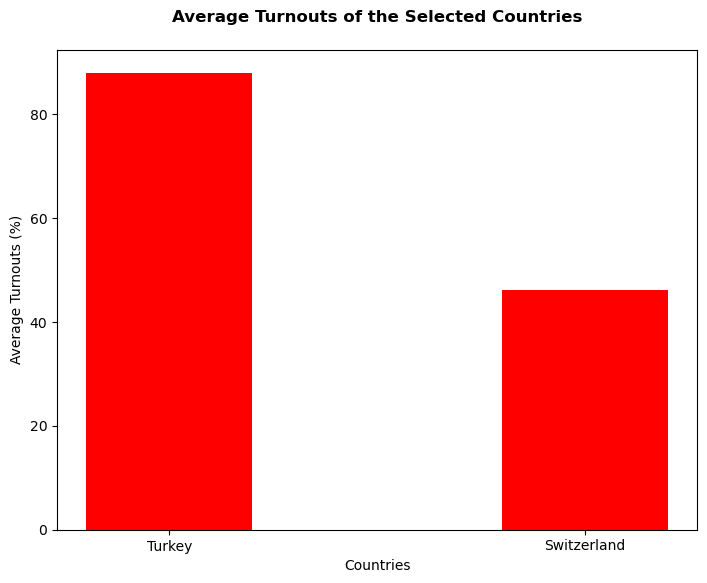

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = ['Turkey', 'Switzerland']
turnouts = [turnout_list['Turkey'],turnout_list['Switzerland']]
plt.title('Average Turnouts of the Selected Countries', fontsize=12, fontweight='bold', pad=20)
ax.bar(countries,turnouts, color = 'r', width = 0.4)
plt.ylabel('Average Turnouts (%)')
plt.xlabel('Countries')
plt.show()

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Percentage of Women Representers in Parliament </b></font> 
<br>
<br> 

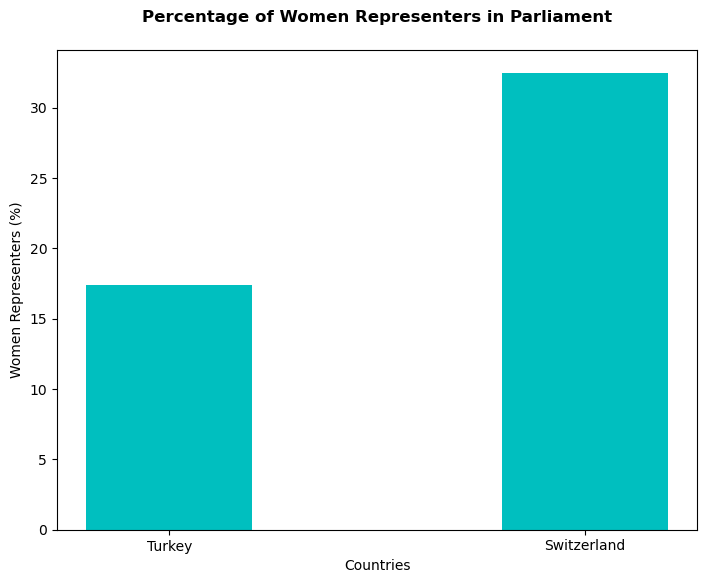

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = ['Turkey', 'Switzerland']
women_in_parliament = [df_dict['Turkey']['women_in_parliament'][0],df_dict['Switzerland']['women_in_parliament'][0]]
plt.title('Percentage of Women Representers in Parliament', fontsize=12, fontweight='bold', pad=20)
ax.bar(countries,women_in_parliament, color = 'c', width = 0.4)
plt.ylabel('Women Representers (%)')
plt.xlabel('Countries')
plt.show()

<br>
<br>
<font face="Helvetica"  size="5px" color="#323752" ><b>Gender of Respondents </b></font> 
<br>
<br> 

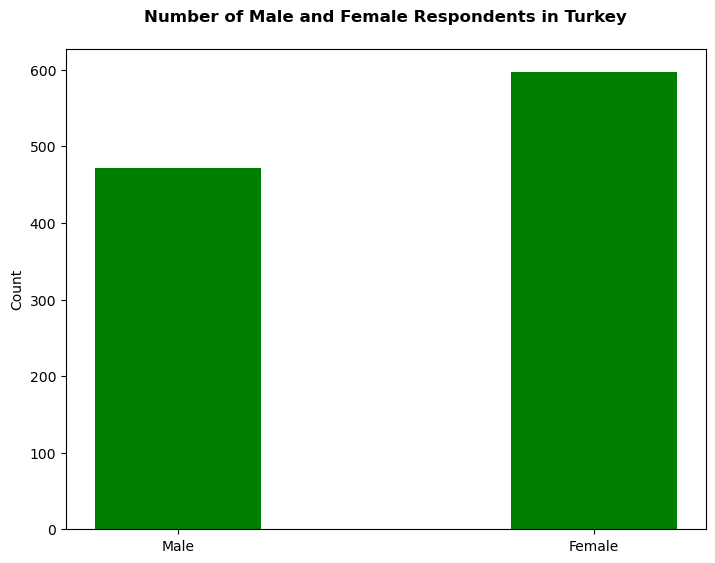

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_t = {count_male_t,count_female_t}
plt.title('Number of Male and Female Respondents in Turkey', fontsize=12, fontweight='bold', pad=20)
ax.bar(gender,count_t, color = 'g', width = 0.4)
plt.ylabel('Count')
plt.show()

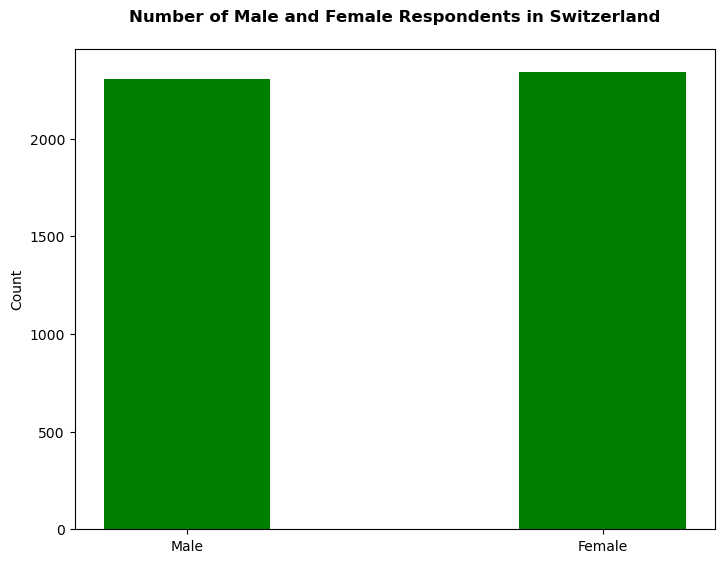

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_s = {count_male_s,count_female_s }
plt.title('Number of Male and Female Respondents in Switzerland', fontsize=12, fontweight='bold', pad=20)
ax.bar(gender,count_s, color = 'g', width = 0.4)
plt.ylabel('Count')
plt.show()

<br>
<font face="Helvetica"  size="6px" color="#323752" > Interactive Plot for Social Factors</font>

***

<br>
<font face="Helvetica" size="3px" color="#323752"> Again, we will use an interactive widget to obtain the desired graphs.  Before starting to create our widgets, labels for graphs is given below.</font>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752"> <b>Education Status</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION</li>
  <li>02. EMPLOYED - PART-TIME (15-32 HOURS WEEKLY)</li>
  <li>03. ISCED LEVEL 2 - LOWER SECONDAR</li>
  <li>04. ISCED LEVEL 3 - UPPER SECONDARY</li>
  <li>05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY</li>
  <li>06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY</li>
  <li>07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT</li>
  <li>08. ISCED LEVEL 7 - MASTER OR EQUIVALENT</li>
  <li>09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT</li>
  <li>00. NONE (NO EDUCATION)</li>
  <li>-01. MISSING/NO INFORMATION</li> 
</ul>
</font>

<br>
<font face="Helvetica" size="3px" color="#323752"> <b>Degree of Closeness to Party</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>1. VERY CLOSE</li>
  <li>2. SOMEWHAT CLOSE</li>
  <li>3. NOT VERY CLOSE</li>
  <li>-1. MISSING/NO INFORMATION</li>
</ul>
</font>

<br>
<font face="Helvetica" size="3px" color="#323752"> <b>Employement Status</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>01. EMPLOYED - FULL-TIME (32 OR MORE HOURS WEEKLY)</li>
  <li>02. EMPLOYED - PART-TIME (15-32 HOURS WEEKLY)</li>
  <li>03. EMPLOYED - LESS THAN 15 HOURS</li>
  <li>04. HELPING FAMILY MEMBER</li>
  <li>05. UNEMPLOYED</li>
  <li>06. STUDENT, IN SCHOOL, IN VOCATIONAL TRAINING</li>
  <li>07. RETIRED</li>
  <li>08. HOUSEWIFE, HOME DUTIES</li>
  <li>09. PERMANENTLY DISABLED</li>
  <li>10. OTHERS, NOT IN THE LABOR FORCE</li>
  <li>-01. MISSING/NO INFORMATION</li> 
</ul>
</font>

In [42]:
a = widgets.Dropdown(
    options=['Education Level', 'Closeness to a Pary', 'Employement Status'],
    value='Education Level',
    description='Social Factors:',
    disabled=False,
    continuous_update=False
)

b = widgets.Dropdown(
    options=['Turkey', 'Switzerland'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)


c = widgets.Dropdown(
    options=['Total', 'Gender divided'],
    value='Total',
    description='Graph:',
    disabled=False,
    continuous_update=False
)

def social_graph(social,country,graph):
    if graph == 'Total':
        if social == "Education Level":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='education', data=df_dict[country], stat="percent", discrete=True, kde=True);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Education Status of %s'%(country), fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('EDUCATION STATUS')
        
        elif social == "Closeness to a Pary":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='closeness_party', data=df_dict[country],  stat="percent", discrete=True, kde=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Closeness to a Party in %s'%(country), fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Closeness to a Party')
            
        elif social == "Employement Status":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='employement', data=df_dict[country],  stat="percent", discrete=True, kde=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Employment Status in Turkey', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Employment Status')
    
    elif graph == 'Gender divided':
        if social == "Education Level":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='education', data=df_dict[country],alpha = .7 ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Education Status of Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('EDUCATION STATUS')
            plt.show()
        
        elif social == "Closeness to a Pary":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='closeness_party', data=df_dict[country],alpha = .7
                        ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Closeness to a Party in Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Closeness to a Party ')
            plt.show()
            
        elif social == "Employement Status":
            plt.figure(figsize=(12, 6))
            sns.histplot( x='employement', data=df_dict[country],alpha = .7
                        ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Employment Status in Switzerland with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Employment Status')
            plt.show()
    
widgets.interact(social_graph, social=a, country=b, graph=c);         
            
   

interactive(children=(Dropdown(description='Social Factors:', options=('Education Level', 'Closeness to a Pary…